#Import Library

In [3]:
from google.colab import files    # upload
import numpy as np                # mathematical calculations
from io import BytesIO            # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from mpl_toolkits import mplot3d  # 3D plots
import cv2 as cv2

import time
from IPython import display
import random

Upload image#

In [4]:
#upload a .jpg image
uploaded = files.upload()
image = Image.open(BytesIO(uploaded['cup.jpg']))

Saving cup.jpg to cup.jpg


In [5]:
image = np.array(image)

# What is a numpy arry:


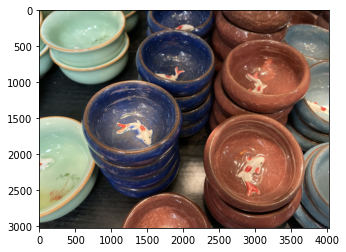

In [6]:
plt.imshow(image)

Down Sampling: crop = image[550:850:6, 900:1075:6,:]

(125, 200, 3)


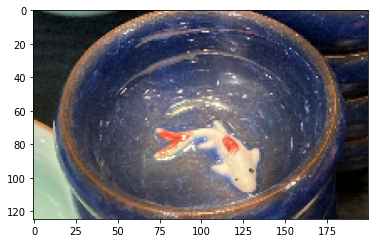

In [7]:
crop = image[1000:2000:8, 500:2100:8, :]
print(crop.shape)
plt.imshow(crop)

0 = red
1 = green
2 = blue
min colour value = 0
max colour value = 225

rgb = uint8 smaller to 8bits or 2^8

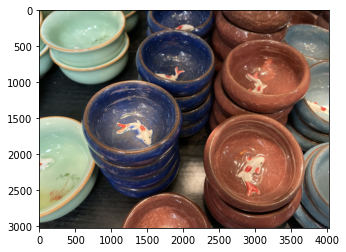

In [8]:
#show image
plt.imshow(image)
plt.show()

1.What is this 3rd dimension, with 3 layers.

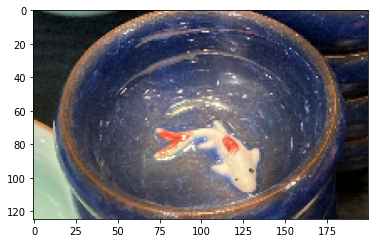

In [9]:
plt.imshow(crop)

In [10]:
r = 0
g = 0
b = 0
m = 0
x, y, d = crop.shape
for i in range(x):
  for j in range(y):
    m = max(crop[i, j,:])
    if crop[i, j, 0] == m:
      r += 1
    if crop[i, j, 1] == m:
      g += 1
    if crop[i, j, 2] == m:
      b += 1
print(r, g, b)
    


6796 2363 16737


107.92373831766503


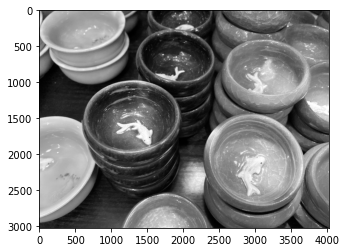

In [11]:
l = []
plt.imshow(image[:,:,0] , cmap="gray")
print(image[:,:,0].mean())
l.append(["green", image[:,:,0].mean()]);

91.05721293146888


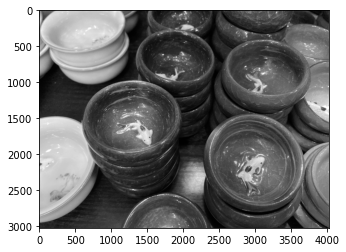

In [12]:
plt.imshow(image[:,:,1] , cmap="gray")
print(image[:,:,1].mean())
l.append(["green", image[:,:,1].mean()]);

82.66393783593685
[['green', 107.92373831766503], ['green', 91.05721293146888], ['blue', 82.66393783593685]]


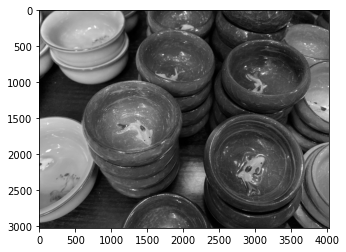

In [13]:
plt.imshow(image[:,:,2] , cmap="gray")
print(image[:,:,2].mean())
l.append(["blue", image[:,:,2].mean()]);
print(l)

In [14]:
def distanceS(c, c1):
  return np.sqrt(np.square(c[0] - c1[0]) + np.square(c[1] - c1[1]) + np.square(c[2] - c1[1]))

def assign(centers, image):
  """
  i:
  centers: dict of rgb arrays
  image; 3D coloured image
  o:
  dict - cluster number mapping to list of pixels
  """
  output = {}
  rgb = []
  ll = []
  for ind, value in centers.items():
    output[ind] = [] 
  x, y, d = image.shape
  for i in range(x):
    for j in range(y):
      ll = [0, 0, 20000000]
      for ind, z in centers.items():
        rgb = image[i, j, :]
        if distanceS(z, rgb) < ll[2]:
          ll = [ind, z, distanceS(z, rgb)]
      output[ll[0]].append([i, j]) 
  return output

      

def find_centroid(li, image):
  """
  i:
  li = list of pixel loaction [row, col]
  o:
  new_centers: new rbg arrays
  """
  new_centre = []
  r = 0
  g = 0
  b = 0
  num = len(li)
  x, y, d = image.shape
  if len(li) == 0:
    return list([int(random.randint(0,255)), int(random.randint(0,255)), int(random.randint(0,255))])
  for i in li:
    row = i[0]
    col = i[1]
    r += image[row, col, 0]
    g += image[row, col, 1]
    b += image[row, col, 2]
  new_centre = list([int(r/num), int(g/num), int(b/num)])
  return new_centre


def im2plot(image, centroids, clusters):
  """
  plotting da image
  image image
  centroids colour rgb
  cluster dict list of pixels
  """
  #Step 1
  new = image.copy()
  for x,z in clusters.items():
    rgb = centroids[x]
    for y in z:
      new[y[0], y[1], 0] = rgb[0]
      new[y[0], y[1], 1] = rgb[1]
      new[y[0], y[1], 2] = rgb[2]
  return new



def error(im1, im2):
  width = im1.shape[0]
  length = im1.shape[1]

  r_diff = im1[:,:,0] - im2[:,:,0]
  g_diff = im1[:,:,1] - im2[:,:,1]
  b_diff = im1[:,:,2] - im2[:,:,2]

  err = np.sqrt(np.square(r_diff) + np.square(g_diff) + np.square(b_diff)).astype(np.float32)

  #normalize
  err = err/np.sqrt(np.square(255) + np.square(255) + np.square(255))
  err = np.sum(err)/(width * length)
  return err



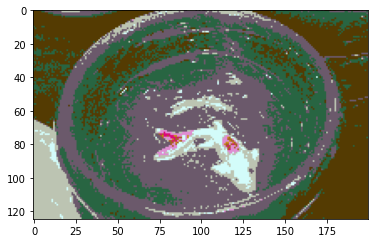

In [15]:
k = 20
max_itr = 8
randR = np.random.uniform(low=0, high=1, size=k)* 255
randG = np.random.uniform(low=0, high=1, size=k)* 255
randB = np.random.uniform(low=0, high=1, size=k)* 255
centroids = {ind: [int(randR[ind]), int(randG[ind]), int(randB[ind])] for ind in range(len(randR))}
region = assign(centroids, crop)
im = im2plot(crop, centroids, region)
plt.imshow(im)



In [16]:
err = error(im, crop)
print(err)

0.023985390625


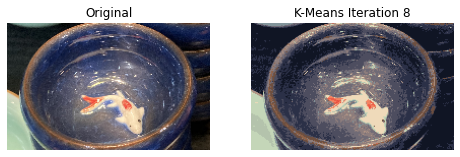

In [17]:
error_log = {}
itr = 0
while itr <= max_itr:
  region = assign(centroids, crop)
  try:
    im = im2plot(crop, centroids, region)
    error_log[itr] = error(im, crop)
    # Plotting code
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 6])
    ax1.set_title('Original')
    ax2.set_title("K-Means Iteration %d" % itr)
    im1 = ax1.imshow(crop, cmap="gray")
    im2 = ax2.imshow(im, cmap="gray")
    ax1.axis('off')
    ax2.axis('off')
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.1)
    plt.close()

  except KeyboardInterrupt:
      break
  centroids = {}
  itr += 1
  for ind in range(k):
    centroids[ind] = find_centroid(region[ind], crop)
  
    

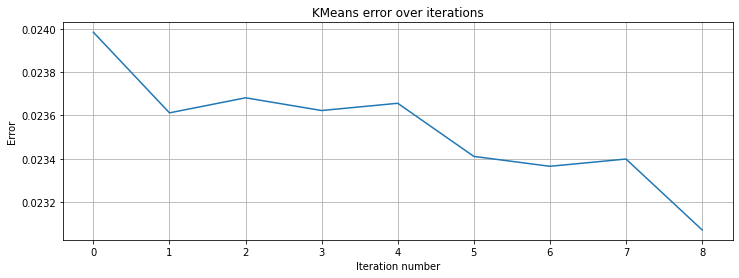

In [18]:
fig = plt.figure(figsize=(12,4))
plt.plot(list(error_log.keys()), list(error_log.values()))
plt.title("KMeans error over iterations")
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.grid('on')

Change color


{0: [190, 109, 81], 1: [132, 49, 123], 2: [137, 149, 156], 3: [139, 124, 123], 4: [134, 93, 67], 5: [178, 144, 124], 6: [79, 80, 98], 7: [21, 26, 43], 8: [112, 107, 118], 9: [7, 164, 112], 10: [236, 65, 58], 11: [233, 75, 58], 12: [193, 207, 180], 13: [175, 186, 168], 14: [101, 76, 65], 15: [237, 89, 68], 16: [243, 129, 96], 17: [242, 219, 186], 18: [50, 54, 78], 19: [47, 228, 53]}


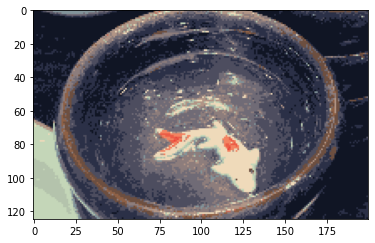

In [19]:
plt.imshow(im)
print(centroids)

In [20]:
def alter_single_centroids(image, centroid_number, clusters, new_colour):
  """
  I:
  image the already clustered image
  centroid_number integerr key in our dicts mapping to each centroid colour
  clusters dict mapping cluster number to list of pixels belonging in that cluster
  new_cluster_colour - a new image with altered colour
  """
  new_im = image.copy()
  for i in clusters[centroid_number]:
    new_im[i[0], i[1], :] = new_colour
  return new_im

  
  


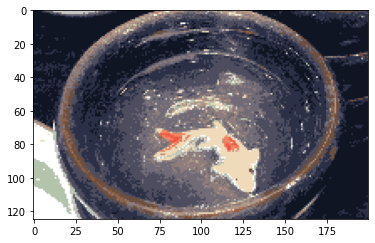

In [21]:
alter = alter_single_centroids(im, 9, region, np.array([194, 4, 4]))
alter = alter_single_centroids(alter, 12, region, np.array([255, 255, 255]))
alter = alter_single_centroids(alter, 2, region, np.array([200, 200, 200]))
plt.imshow(alter)


Edge Detection

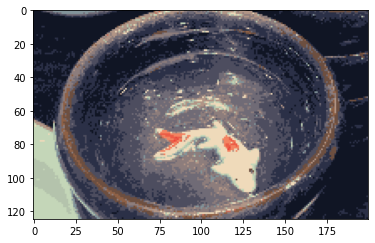

In [22]:
plt.imshow(im)

In [23]:
def greyscale(image):
  """
  Given a coloured rgb image, return the greyscale image.
  input:
    image - np array 3d
  output:
    grey - np array 2d
  """
  grey = 0.3*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]
  return grey.astype(np.uint8)

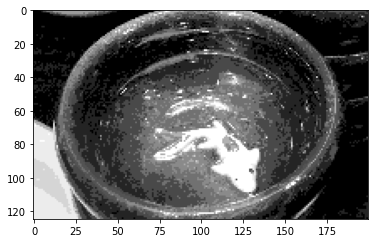

In [24]:
grey = greyscale(im)
plt.imshow(grey, cmap="gray")